<a href="https://colab.research.google.com/github/Nouman97/Computer-Vision/blob/master/Water_Reflections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

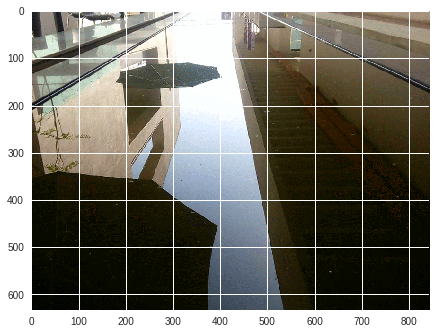

In [0]:
import cv2
import matplotlib.pyplot as plt

a = cv2.imread('Capture.PNG')
b = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

plt.imshow(b)

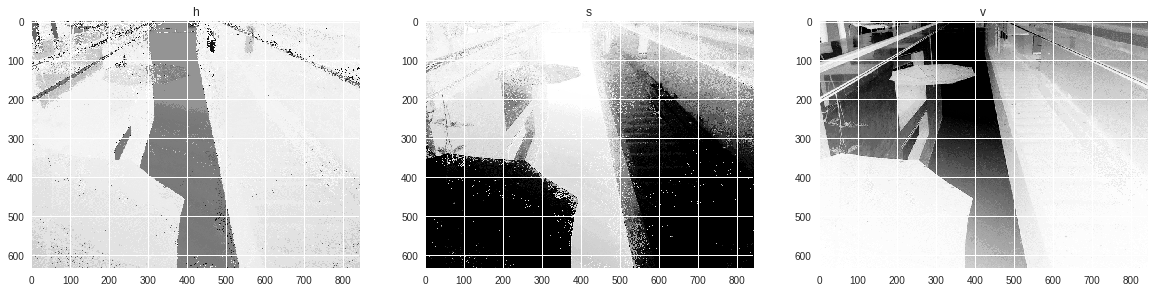

In [0]:
c = cv2.cvtColor(b, cv2.COLOR_RGB2HSV)

f, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (20, 20))
ax1.set_title("h")
ax1.imshow(c[:,:,0])
ax2.set_title("s")
ax2.imshow(c[:,:,1])
ax3.set_title("v")
ax3.imshow(c[:,:,2])

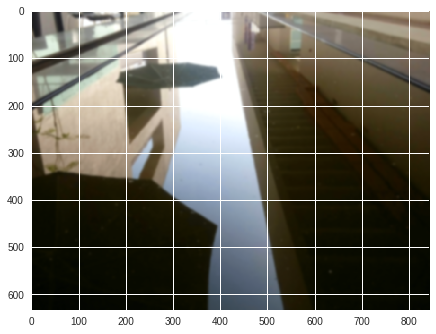

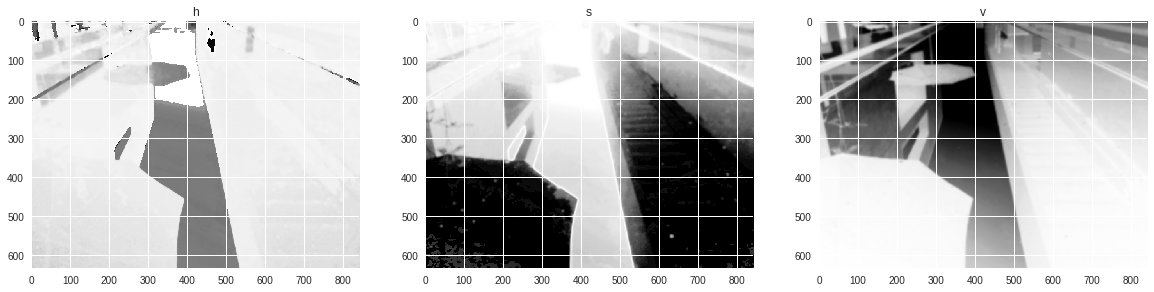

In [0]:
m = cv2.GaussianBlur(b, (9, 9), 0)
m = cv2.GaussianBlur(m, (9, 9), 0)

plt.imshow(m)

n = cv2.cvtColor(m, cv2.COLOR_RGB2HSV)

plt.figure()
f, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize = (20, 20))
ax1.set_title("h")
ax1.imshow(n[:,:,0])
ax2.set_title("s")
ax2.imshow(n[:,:,1])
ax3.set_title("v")
ax3.imshow(n[:,:,2])

(25, 1, 4)
[[431  68 544 464]]


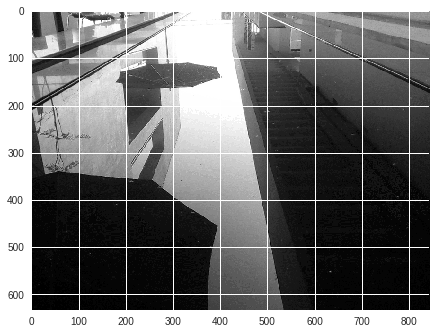

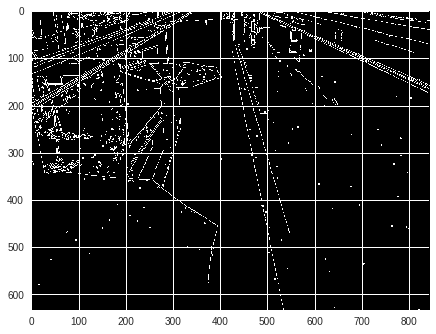

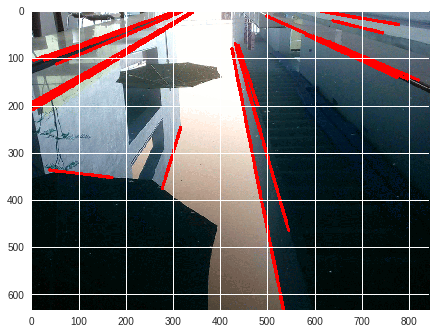

In [0]:
import numpy as np

gray_phone = cv2.cvtColor(b, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.imshow(gray_phone, cmap = 'gray')

edge = cv2.Canny(gray_phone, 50, 100)

plt.figure()
plt.imshow(edge, cmap = 'gray')

# probabilistic hough transform

# resolution of hough space (rho, thetha)

# 1 pixel

rho = 1

# 1 degree

theta = np.pi/180

# minimum line length in pixels

min_line_length = 100

# maximum allowable gap between pixels

max_line_gap = 5

# minimum number of hough space intersections to call it a line

threshold = 60

phone_lines = np.copy(b)
phone_lines = cv2.cvtColor(phone_lines, cv2.COLOR_BGR2RGB)

# cv2.HoughLinesP(edge image, rho, thetha, threshold, np.array([]),
# min_line_length, max_line_gap) -> returns a 'k x 1 x 4' tensor where 
# k is the number of lines detected, '1 x 4' is a tuple consisting of (x1, y1, 
# x2, y2) for each line; these are found using a probabilistic hough transform

lines= cv2.HoughLinesP(edge, rho, theta, threshold, 
                      np.array([]), min_line_length,
                      max_line_gap)

# shape of lines (k x 1 x 4)

print(lines.shape)

# printing the first element containing (x1, y1, x2, y2)

print(lines[0])

# cv2.line(image, (x1, y1), (x2, y2), (R, G, B), line_thickness) -> draws a
# line on the image having end points (x1, y1) and (x2, y2)
# note: if the image was BGR. it would have been (B, G, R) instead of (R, G, B)

# drawing lines on the image

for line in lines:
  for x1, y1, x2, y2 in line:
    cv2.line(phone_lines, (x1, y1), (x2, y2), (255, 0, 0), 5)

plt.figure()
plt.imshow(phone_lines)
